## 1. Import Module and generate mock data for tasks and robots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Set random seed for reproducibility
np.random.seed(42)

# Function to generate mock data for tasks and robots
def generate_mock_data(num_tasks=10, num_robots=5):
    task_durations = np.random.randint(1, 11, size=num_tasks)  # Random task durations between 1 and 10 hours
    task_priorities = np.random.randint(1, 6, size=num_tasks)  # Random task priorities between 1 and 5
    #robot_efficiencies = np.random.uniform(0.5, 1.5, size=num_robots)  # Random robot efficiencies between 0.5 and 1.5
    robot_efficiencies = [0.001, 0.1, 0.2, 0.3, 0.4]
    return task_durations, task_priorities, robot_efficiencies


## 2. Helper Functions

In [ ]:
# Placeholder for the initial population generation
def initialize_population(population_size, num_tasks, num_robots):
  population = [np.random.randint(0, len(robot_efficiencies),size=len(task_durations)) for _ in range(population_size)]
  return population

def fitness(task_assignments, task_durations, robot_efficiencies, task_priorities):
  total_times = np.zeros(len(robot_efficiencies))

  for i in range(len(task_assignments)):
    robot = task_assignments[i]

    task_time = (task_durations[i] * task_priorities[i]) / robot_efficiencies[robot]

    total_times[robot] += task_time

  total_production_time = np.max(total_times)

  workload_balance = np.std(total_times)

  fitness_score = 1 / (total_production_time + workload_balance)

  return fitness_score


def selection(population, fitness_scores, num_parents):
  # tournament selection
  population_size = len(population)
  tournament_size = population_size // 6

  selected_parents = np.empty(num_parents, dtype=object)

  for i in range(num_parents):
    # randomly select individuals for the tournament
    tournament_indices = np.random.choice(population_size, tournament_size, replace=False)
    tournament_fitness_scores = [fitness_scores[i] for i in tournament_indices]

    # find the index of the winner (individual with the highest fitness) in the tournament
    winner_index = tournament_indices[np.argmax(tournament_fitness_scores)]

    selected_parents[i] = population[winner_index]

  return selected_parents

def crossover(parents, offspring_size):
  offsprings = []

  for i in range(offspring_size // 2):
    # select two parents for crossover
    parent1 = parents[i % len(parents)]
    parent2 = parents[(i + 1) % len(parents)]

    # randomly choose a crossover point
    crossover_point = np.random.randint(1, len(parent1))

    # perform single-point crossover
    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))

    offsprings.append(offspring1)
    offsprings.append(offspring2)

  return offsprings

def mutation(offspring_crossover):
  mutated_offspring = np.copy(offspring_crossover)

  for offspring in mutated_offspring:
    # randomly select two tasks to swap robots
    task1_index, task2_index = np.random.choice(len(offspring), 2, replace=False)

    # swap the robots assigned to these tasks
    offspring[task1_index], offspring[task2_index] = offspring[task2_index], offspring[task1_index]

  return mutated_offspring


## 3. Genetic Algoritm Implemntation

In [ ]:

# GA algorithm placeholder for students to implement their solution
def run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies, num_tasks, num_robots):

    population_size = 50
    generations = 500
    num_parents = population_size // 3

    population = initialize_population(population_size=population_size, num_tasks=num_tasks, num_robots=num_robots)

    for generation in range(generations):
        fitness_scores = [fitness(task_assignments=sample, task_durations = task_durations, robot_efficiencies=robot_efficiencies, task_priorities=task_priorities) for sample in population]


        selected_parents = selection(population=population, fitness_scores=fitness_scores, num_parents=num_parents)

        offspring_crossover = crossover(parents=selected_parents, offspring_size=population_size-num_parents)

        offspring_mutated = mutation(offspring_crossover=offspring_crossover)

        population[:len(selected_parents)] = selected_parents
        population[len(selected_parents):] = offspring_mutated

    fitness_scores = [fitness(task_assignments=sample, task_durations = task_durations, robot_efficiencies=robot_efficiencies, task_priorities=task_priorities) for sample in population]
    best_solution = population[fitness_scores.index(max(fitness_scores))]

    return best_solution

## 4. Visualization Using Grid

In [ ]:
def visualize_assignments_improved(solution, task_durations, task_priorities, robot_efficiencies):
    grid = np.zeros((len(robot_efficiencies), len(task_durations)))
    annotations = np.empty((len(robot_efficiencies), len(task_durations)), dtype=object)

    for task_idx, robot_idx in enumerate(solution):
        duration = task_durations[task_idx]
        priority = task_priorities[task_idx]

        grid[robot_idx, task_idx] = duration

        for robot_index in range(len(robot_efficiencies)):
            annotations[robot_index, task_idx] = (duration, priority)

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])  # custom colormap

    # display the grid with task durations
    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    # annotate each cell with task priority and duration
    for (i, j), val in np.ndenumerate(annotations):
        if val:  # check if cell is assigned
            duration, priority = val
            ax.text(j, i, f"P{priority}\n{duration}h", ha='center', va='center', fontsize=8)

    # set the ticks and labels for tasks and robots
    ax.set_xticks(np.arange(len(task_durations)))
    ax.set_yticks(np.arange(len(robot_efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(task_durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.2f})' for i, eff in enumerate(robot_efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    # create a legend for task priorities
    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()


## Main Function

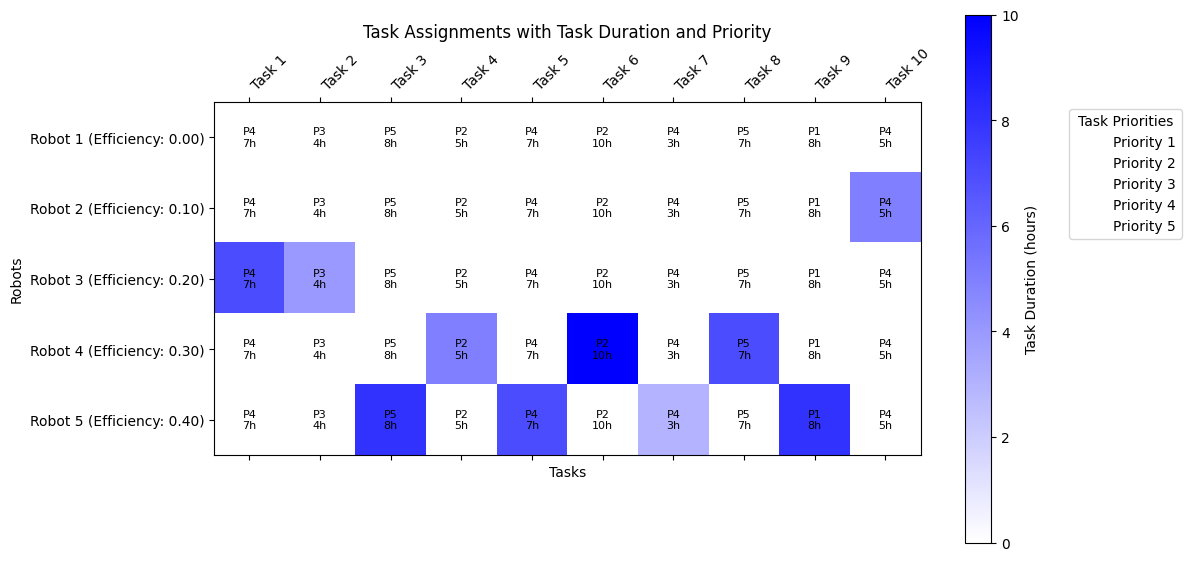

In [ ]:
# Main execution
if __name__ == "__main__":
    num_tasks = 10
    num_robots = 5
    task_durations, task_priorities, robot_efficiencies = generate_mock_data(num_tasks, num_robots)

    # Run GA to find the best solution
    best_solution = run_genetic_algorithm(task_durations, task_priorities, robot_efficiencies, num_tasks, num_robots)

    # Visualize the initial random assignment
    visualize_assignments_improved(best_solution, task_durations, task_priorities, robot_efficiencies)
